# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-ncuerpos_solucion_numerica.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del Problema de N cuerpos y su solución numérica 

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Unidades canónicas

Unidades canónicas para un problema en el sistema solar:

In [3]:
G=6.67308e-11 # m^3/kg/s
UL=1.496e11 #m
UM=1.98e30 #kg

UT=(UL**3/(G*UM))**0.5 #s

from pprint import pprint
print(f"""
UT = {UT} segundos
   = {UT/3600} horas 
   = {UT/86400} días 
   = {UT/(365.256363004*86400)} años
""")


UT = 5033865.755208481 segundos
   = 1398.296043113467 horas 
   = 58.26233512972779 días 
   = 0.15951080126450734 años



Unidades canónicas derivadas:

In [4]:
UV=UL/UT
UA=UL/UT**2
UF=UM*UA
UP=UM*UV
UH=UM*UL*UP
UE=UM*UL**2/UT**2

print(f"""
    Velocidad, UV = {UV} m/s
    Aceleración, UA = {UA} m/s^2
    Fuerza, UF = {UF} N
    Momento lineal, UP = {UP} kg m/s
    Momento angular, UH = {UH} kg m^2/s
    Energía, UE = {UE} kg m^2/s^2
""")


    Velocidad, UV = 29718.710683774327 m/s
    Aceleración, UA = 0.005903755111670335 m/s^2
    Fuerza, UF = 1.1689435121107264e+28 N
    Momento lineal, UP = 5.884304715387317e+34 kg m/s
    Momento angular, UH = 1.7429781311354465e+76 kg m^2/s
    Energía, UE = 1.7487394941176467e+39 kg m^2/s^2



### Ecuaciones de movimiento reducidas

En este código se muestra el procedimiento relativamente detallado para la solución numérica al problema de los N cuerpos:

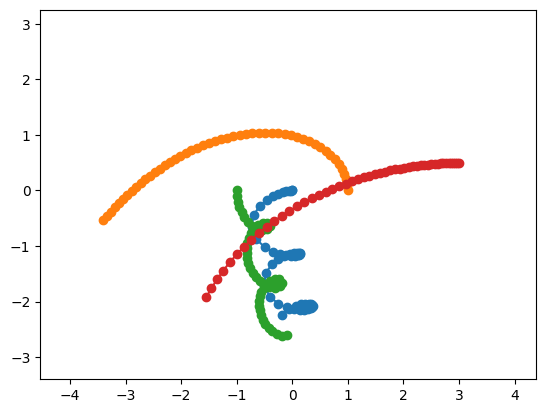

In [6]:
# Definición de las condiciones iniciales 
sistema_ejemplo=[
    dict(m=1.0,r=[0.0,0.0,0.0],v=[0.0,0.0,0.0]),
    dict(m=0.2,r=[1.0,0.0,0.0],v=[0.0,1.0,0.0]),
    dict(m=1.5,r=[-1.0,0.0,0.0],v=[0.0,-1.0,0.5]),
    dict(m=0.1,r=[3.0,0.5,0.0],v=[-0.3,0.0,0.0]),
]
from pymcel import sistema_a_Y
N,mus,Yo=sistema_a_Y(sistema_ejemplo)

#Tiempo de integración
import numpy as np
Nt=50
ts=np.linspace(0.0,5,Nt,endpoint=True)

# Solución al sistema de ecuaciones diferenciales
from scipy.integrate import odeint

from pymcel import edm_ncuerpos
solucion_ejemplo=odeint(edm_ncuerpos,Yo,ts,args=(N,mus))

from pymcel import solucion_a_estado
rs,vs=solucion_a_estado(solucion_ejemplo,N,Nt)

# Componente gráfica del algoritmo
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

for i in range(N):
    ax.plot(rs[i,:,0],rs[i,:,1],marker='o');

from pymcel.plot import fija_ejes_proporcionales
fija_ejes_proporcionales(ax,rs);

El mismo procedimiento se puede resumir como:

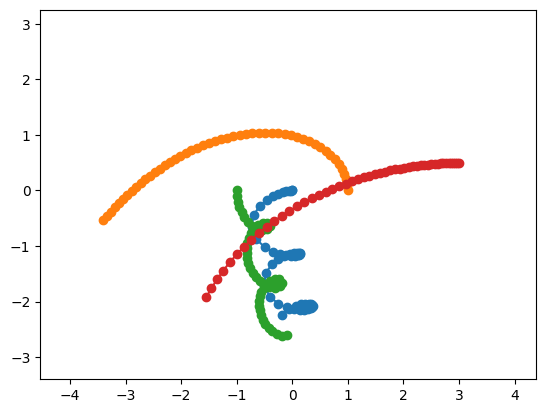

In [7]:
# Definición de las condiciones iniciales 
sistema_ejemplo=[
    dict(m=1.0,r=[0.0,0.0,0.0],v=[0.0,0.0,0.0]),
    dict(m=0.2,r=[1.0,0.0,0.0],v=[0.0,1.0,0.0]),
    dict(m=1.5,r=[-1.0,0.0,0.0],v=[0.0,-1.0,0.5]),
    dict(m=0.1,r=[3.0,0.5,0.0],v=[-0.3,0.0,0.0]),
]
from pymcel import ncuerpos_solucion
Nt=50
ts=np.linspace(0.0,5,Nt,endpoint=True)
rs,vs,rps,vps,cuadraturas=ncuerpos_solucion(sistema_ejemplo,ts)

# Componente gráfica del algoritmo
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

for i in range(N):
    ax.plot(rs[i,:,0],rs[i,:,1],marker='o');

from pymcel.plot import fija_ejes_proporcionales
fija_ejes_proporcionales(ax,rs);

El mismo sistema animado:

In [16]:
# Definición de las condiciones iniciales 
sistema_ejemplo=[
    dict(m=1.0,r=[0.0,0.0,0.0],v=[0.0,0.0,0.0]),
    dict(m=0.2,r=[1.0,0.0,0.0],v=[0.0,1.0,0.0]),
    dict(m=0.0,r=[-1.0,0.0,0.0],v=[0.0,-1.0,0.0]),
]
N,mus,Yo=sistema_a_Y(sistema_ejemplo)

#Tiempo de integración
import numpy as np
Nt=50
ts=np.linspace(0.0,10.0,Nt,endpoint=True)

# Solución al sistema de ecuaciones diferenciales
from scipy.integrate import odeint
solucion_ejemplo=odeint(edm_ncuerpos,Yo,ts,args=(N,mus))
rs,vs=solucion_a_estado(solucion_ejemplo,N,Nt)

# Componente gráfica del algoritmo
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

puntos=[]
lineas=[]
for i in range(N):
    punto,=ax.plot(rs[i,0,0],rs[i,0,1],marker='o',lw=0);
    linea,=ax.plot(rs[i,0,0],rs[i,0,1],marker=None,lw=1,color='k');
    puntos+=[punto]
    lineas+=[linea]

titulo=ax.set_title(f"t = {ts[0]}")
vmax=abs(rs).max()
ax.set_ylim((-vmax,vmax))
ax.set_xlim((-vmax,vmax))
ax.grid()

# Animación
from matplotlib import animation
def animacion(it):
    for i in range(N):
        puntos[i].set_data([rs[i,it,0]],[rs[i,it,1]])
        lineas[i].set_data([rs[i,:it,0]],[rs[i,:it,1]])
    titulo.set_text(f"t = {ts[it]:.2f}")
    return titulo,

anim=animation.FuncAnimation(fig,animacion,frames=Nt,interval=50,blit=True,repeat=False);
plt.close('all')

from IPython.display import HTML
HTML(anim.to_jshtml())

### Constantes de movimiento

In [19]:
#Número de partículas
N=5

#Generación de las condiciones para cada partícula
from numpy.random import uniform,seed
seed(7)

#Condiciones iniciales
sistema=[]
for i in range(N):
    particula=dict(
        m=uniform(0.0,1.0),
        r=uniform(-1.0,1.0,size=3),
        v=uniform(-1.0,1.0,size=3)
    )
    sistema+=[particula]

from pymcel import sistema_a_Y
N,mus,Y0s=sistema_a_Y(sistema)

#Tiempos
from numpy import linspace
Nt=100
ts=linspace(0.0,10.0,Nt)

print(f"N = {N}")
print(f"mus = {mus}")
print(f"Y0s = {Y0s}")

N = 5
mus = [0.07630829 0.07205113 0.2881456  0.9501295  0.66901324]
Y0s = [ 5.59837584e-01 -1.23181537e-01  4.46930356e-01 -4.63122040e-01
 -2.34998349e-04  3.58459992e-01  8.19187055e-01 -5.73229293e-01
 -9.57520764e-02 -5.39394242e-01  9.69798385e-02  8.18256750e-01
 -6.44942805e-02 -5.90301819e-01 -1.84682218e-02  9.55979024e-01
  7.69917408e-02  2.24092732e-03  6.07478072e-01 -2.38117734e-01
 -8.68127306e-01  8.62412039e-01 -9.50201545e-01  2.01097835e-01
 -7.33661108e-01  4.68251613e-02  5.00819718e-01 -2.55230621e-01
 -4.51976903e-02 -2.68219228e-01]


Podemos resolver la ecuación de movimiento:

In [22]:
#Solución
from scipy.integrate import odeint
solucion=odeint(edm_ncuerpos,Y0s,ts,args=(N,mus))

#Extracción de las posiciones y velocidades
rs,vs=solucion_a_estado(solucion,N,Nt)

Las constantes de movimiento son:

In [23]:
from numpy import zeros
C_PCM=zeros((Nt,3))
for i in range(N):
    C_PCM=C_PCM+mus[i]*vs[i,:,:]

print(f"C_PCM = \n{C_PCM[:5]}\n...")

from numpy import zeros,cross
C_L=zeros((Nt,3))
for i in range(N):
    C_L=C_L+mus[i]*cross(rs[i,:,:],vs[i,:,:])

print(f"C_L = \n{C_L[:5]}\n...")

from numpy import zeros
from numpy.linalg import norm

C_E=zeros(Nt)
K=zeros(Nt)
U=zeros(Nt)
for i in range(N):
    K=K+0.5*mus[i]*norm(vs[i,:,:],axis=1)**2
    for j in range(N):
        if i==j:continue
        rij=norm(rs[i,:,:]-rs[j,:,:],axis=1)
        U+=-0.5*mus[i]*mus[j]/rij
C_E=K+U

print(f"C_E = {C_E[:5]}...")

C_PCM = 
[[-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]]
...
C_L = 
[[ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685288]]
...
C_E = [-0.53641214 -0.53641214 -0.53641214 -0.53641214 -0.53641214]...


El teorema del virial aplicado a este sistema es:

In [24]:
E=C_E[0]
Kmean=K.mean()
Umean=U.mean()

print(f"-E = {-E}")
print(f"<K> = {Kmean}")
print(f"-<U>/2 = {-Umean/2}")

-E = 0.5364121422571039
<K> = 0.5201023119686995
-<U>/2 = 0.5282572688684869


<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)